In [133]:
import pandas as pd
import numpy as np
from numpy import random
from math import pi
import turtle as tt
import matplotlib.cm as cm
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api
import pandas as pd
import pingouin as pg
from statsmodels.tsa.stattools import *
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model
import sys
sys.path.append("../groundwater")
from calculator import *

In [134]:
data_colo = pd.read_csv("./dataset_tsmc2014/dataset_TSMC2014_NYC_processed2.csv")
data_colo = data_colo.drop(data_colo.iloc[:,[0]],axis=1)
data_mpi = pd.read_csv("./dataset_tsmc2014/dataset_TSMC2014_NYC_mpi.csv")
data_mpi = data_mpi.drop(data_mpi.iloc[:,[0]],axis=1)
# start_t = 108
# end_t = 252
# data_colo = data_colo.iloc[start_t:end_t+1]
# data_mpi = data_mpi.iloc[start_t:end_t+1]

In [135]:
print(data_colo.shape)
data_colo.head()

(288, 49)


,Alcoholic-Related Place,Bank,"Beauty, Cosmetology & Hairdressing",Bridge,Castle,Clothing & Jewelry,Convention Center,Design Studio,Electronics,Embassy / Consulate,...,School,Shop Related to Entertainment,Smoke Shop,Sporting Goods Shop,Storage Facility,"Store, Market & Fair",Transportation,Travel-Related Place,Vehicle Shop,Vehicle-Related Place
0,1.0,10.0,22.0,12.0,0.0,19.0,3.0,0.0,7.0,1.0,...,25.0,5.0,0.0,3.0,0.0,28.0,124.0,5.0,1.0,5.0
1,1.0,0.0,10.0,8.0,0.0,13.0,1.0,1.0,4.0,0.0,...,20.0,4.0,1.0,3.0,0.0,24.0,122.0,4.0,1.0,11.0
2,2.0,6.0,20.0,2.0,0.0,15.0,2.0,0.0,4.0,1.0,...,17.0,0.0,3.0,9.0,1.0,23.0,102.0,3.0,1.0,12.0
3,2.0,3.0,10.0,9.0,0.0,7.0,1.0,0.0,7.0,1.0,...,20.0,1.0,9.0,2.0,0.0,25.0,111.0,1.0,3.0,14.0
4,0.0,5.0,10.0,4.0,0.0,24.0,1.0,0.0,7.0,0.0,...,22.0,2.0,9.0,2.0,0.0,23.0,111.0,2.0,2.0,9.0


In [136]:
print(data_mpi.shape)
data_mpi.head()

(288, 49)


,Alcoholic-Related Place,Bank,"Beauty, Cosmetology & Hairdressing",Bridge,Castle,Clothing & Jewelry,Convention Center,Design Studio,Electronics,Embassy / Consulate,...,School,Shop Related to Entertainment,Smoke Shop,Sporting Goods Shop,Storage Facility,"Store, Market & Fair",Transportation,Travel-Related Place,Vehicle Shop,Vehicle-Related Place
0,0.025641,0.014903,0.019820,0.088889,0.0,0.015794,0.046875,0.000000,0.026415,0.05,...,0.016337,0.015291,0.000000,0.028571,0.000000,0.053763,0.096426,0.022321,0.002762,0.009709
1,0.025641,0.000000,0.009083,0.066667,0.0,0.012150,0.015625,0.022727,0.015094,0.00,...,0.017257,0.012232,0.034483,0.028571,0.000000,0.043011,0.105359,0.017857,0.002762,0.021359
2,0.051282,0.008942,0.018939,0.022222,0.0,0.014205,0.031250,0.000000,0.011321,0.05,...,0.014617,0.000000,0.034483,0.066667,0.166667,0.040860,0.092803,0.013393,0.002762,0.023301
3,0.051282,0.002981,0.009242,0.088889,0.0,0.006542,0.015625,0.000000,0.022642,0.05,...,0.017560,0.003058,0.068966,0.019048,0.000000,0.049462,0.097043,0.004464,0.008287,0.027184
4,0.000000,0.007452,0.009009,0.044444,0.0,0.022706,0.015625,0.000000,0.022642,0.00,...,0.018921,0.006116,0.034483,0.019048,0.000000,0.043011,0.099338,0.008929,0.005525,0.015534


In [137]:
mPIs = data_mpi.mean(axis=0)
mPIs

Alcoholic-Related Place               0.013177
Bank                                  0.011990
Beauty, Cosmetology & Hairdressing    0.011386
Bridge                                0.044550
Castle                                0.006944
Clothing & Jewelry                    0.012641
Convention Center                     0.018934
Design Studio                         0.010022
Electronics                           0.017002
Embassy / Consulate                   0.006424
Factory                               0.015873
Financial or Legal Service            0.006173
Food & Snack                          0.081951
Funeral                               0.014290
Furniture / Home Store                0.014113
General Education Place               0.018099
Government Building                   0.013596
Hardware Store                        0.011811
History, Museum & Arts                0.018953
Hotel                                 0.025949
Indoor Entertainment                  0.172439
Laundry Servi

In [138]:
avg_mpi=mPIs.mean()
print('average modified PI:',avg_mpi)
prevalent_mpi=mPIs[mPIs>avg_mpi]
prevalent_mpi

average modified PI: 0.03026231324175093


Bridge                   0.044550
Food & Snack             0.081951
Indoor Entertainment     0.172439
Neighborhood             0.045807
Office                   0.053717
Outdoor Entertainment    0.063232
Place for Sports         0.057970
Recycling Facility       0.048611
Residence                0.119571
Restaurant               0.150977
School                   0.031826
Transportation           0.119841
dtype: float64

In [139]:
prevalenet_mpi_df=prevalent_mpi.to_frame(name='average modified PI')
prevalent_colo=prevalenet_mpi_df.index.values
print(prevalent_colo)
prevalent_colo=prevalent_colo[(prevalent_colo!='Recycling Facility') & (prevalent_colo!='Bridge')]
print(prevalent_colo)
data_colo=data_colo.filter(items=prevalent_colo)
data_mpi=data_mpi.filter(items=prevalent_colo)

['Bridge' 'Food & Snack' 'Indoor Entertainment' 'Neighborhood' 'Office'
 'Outdoor Entertainment' 'Place for Sports' 'Recycling Facility'
 'Residence' 'Restaurant' 'School' 'Transportation']
['Food & Snack' 'Indoor Entertainment' 'Neighborhood' 'Office'
 'Outdoor Entertainment' 'Place for Sports' 'Residence' 'Restaurant'
 'School' 'Transportation']


In [140]:
data_colo.head()

,Food & Snack,Indoor Entertainment,Neighborhood,Office,Outdoor Entertainment,Place for Sports,Residence,Restaurant,School,Transportation
0,61.0,234.0,22.0,15.0,52.0,107.0,107.0,314.0,25.0,124.0
1,75.0,211.0,33.0,18.0,59.0,85.0,97.0,289.0,20.0,122.0
2,76.0,185.0,30.0,22.0,65.0,62.0,92.0,292.0,17.0,102.0
3,87.0,199.0,32.0,19.0,67.0,66.0,99.0,282.0,20.0,111.0
4,77.0,198.0,26.0,21.0,66.0,78.0,93.0,248.0,22.0,111.0


In [141]:
data_mpi.head()

,Food & Snack,Indoor Entertainment,Neighborhood,Office,Outdoor Entertainment,Place for Sports,Residence,Restaurant,School,Transportation
0,0.049044,0.194514,0.061489,0.012469,0.043225,0.084788,0.085619,0.258520,0.016337,0.096426
1,0.065395,0.191644,0.087379,0.016349,0.050863,0.076294,0.080836,0.260672,0.017257,0.105359
2,0.071970,0.174242,0.071197,0.020833,0.060606,0.057765,0.084280,0.268939,0.014617,0.092803
3,0.072089,0.181146,0.077670,0.017560,0.059150,0.060074,0.087800,0.257856,0.017560,0.097043
4,0.072848,0.185430,0.064725,0.019868,0.059603,0.072848,0.087039,0.232734,0.018921,0.099338


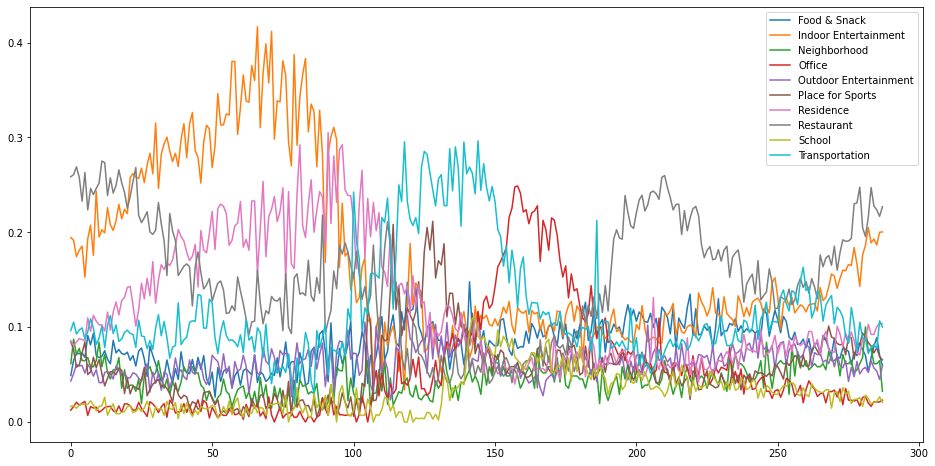

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
for colo in prevalent_colo:
    plt.plot(data_mpi[colo],label=colo)
plt.legend()
plt.show()

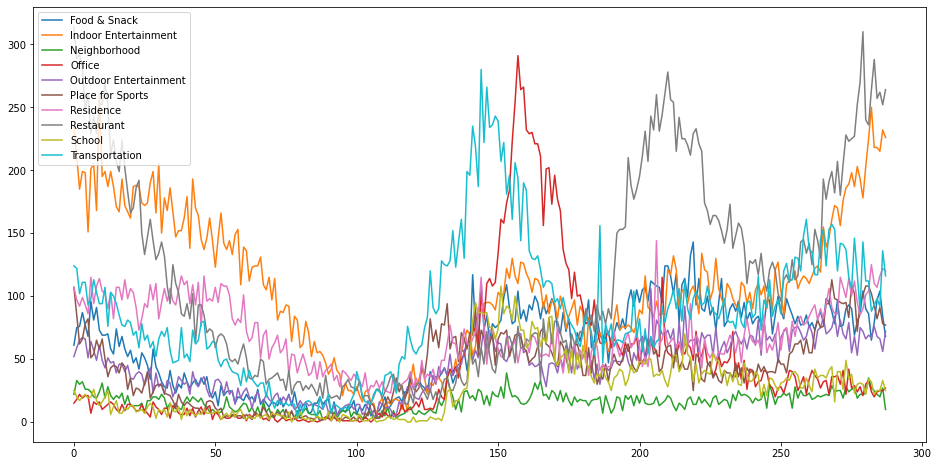

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
for colo in prevalent_colo:
    plt.plot(data_colo[colo],label=colo)
plt.legend()
plt.show()

### Use prevalent_colo, data_colo, data_mpi for later analysis